# Data Viewing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
# BIS tools

import biswebpython.core.bis_baseutils as bis_baseutils
import biswebpython.core.bis_objects as bis

In [2]:
# Load images

# test_mask = bis.bisImage().load('data/raw/GLIA_session1_mouse53_mask.nii')
# test_img = bis.bisImage().load('data/raw/GLIA_session1_mouse53.nii')

# train_mask = bis.bisImage().load('data/raw/SLC_session3_mouse09_mask.nii')

++++ loaded  data/raw/GLIA_session1_mouse53_mask.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=float32
++++ loaded  data/raw/GLIA_session1_mouse53.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=int16
++++ loaded  data/raw/SLC_session3_mouse09_mask.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=float32


In [16]:
# Use file of inputs to get paths
input_file = open('prostate/prostate_input.txt')
input_paths = input_file.read().splitlines()
input_file.close()

input_mask_file = open('prostate/prostate_input_mask.txt')
input_mask_paths = input_mask_file.read().splitlines()
input_mask_file.close()

In [17]:
input_paths[0]

'/data/shared/prostate/yale_prostate/TRUS/0094.nii.gz'

In [18]:
test_input = bis.bisImage().load(input_paths[0])
test_input_mask = bis.bisImage().load(input_mask_paths[0])

++++ loaded  /data/shared/prostate/yale_prostate/TRUS/0094.nii.gz. dims=[175, 175, 170, 1, 1] spa=[0.5, 0.5, 0.5, 1.0, 1.0] orientation=LAS tp=int16
++++ loaded  /data/shared/prostate/yale_prostate/TRUS_mask/0071_0071.nii.gz. dims=[152, 150, 146, 1, 1] spa=[0.5, 0.5, 0.5, 1.0, 1.0] orientation=LAS tp=int16


In [3]:
# # Perturbation
# test_mask.data_array[0][0][0] = 1

In [20]:
# Make images brighter by setting a maximum value


def get_scaled_img(img_array):
    scaled_img = copy.deepcopy(img_array)
    max_val = np.max(scaled_img)
    new_max = int(max_val / 2)
    print('Max Int: ' + str(new_max))
    for val in np.nditer(scaled_img, op_flags=['readwrite']):
        if val > new_max:
            val[...] = new_max
    return scaled_img

In [21]:
# Front view ("Axial"): xy plane
# Side view ("Sagittal"): yz plane
# Top view ("Coronal"): xz plane


def view_slice(img, x, y, z):
    if (
        x > img.data_array.shape[0]
        or y > img.data_array.shape[1]
        or z > img.data_array.shape[2]
    ):
        raise ValueError("Dimension out of bounds.")

    scaled_img = get_scaled_img(img.data_array)
    xy_plane = scaled_img[:, :, z]
    yz_plane = scaled_img[x, :, :]
    xz_plane = scaled_img[:, y, :]

    plt.figure(figsize=(20, 20))
    plt.subplot(131)
    plt.imshow(xy_plane, cmap='gray')
    plt.title('Axial View')

    plt.subplot(132)
    plt.imshow(yz_plane, cmap='gray')
    plt.title('Sagittal View')

    plt.subplot(133)
    plt.imshow(xz_plane, cmap='gray')
    plt.title('Coronal View')

Max Int: 116


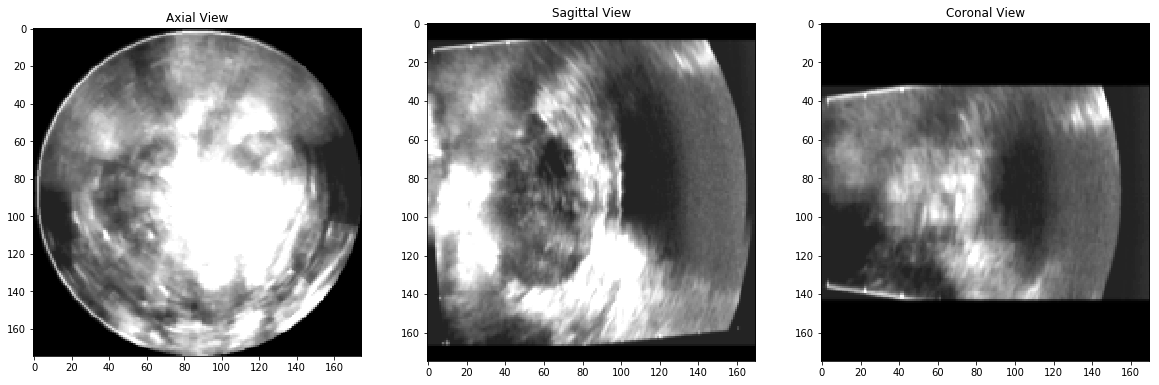

In [22]:
view_slice(test_input, 50, 20, 30)

In [26]:
test_input.data_array.shape

(175, 175, 170)